In [18]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv('parkinsons.data') ## importing the file and storing into the dataframe 'df'

In [26]:
features=df.loc[:,df.columns!='status'].values[:,1:]

labels=df.loc[:,'status'].values

print(labels[labels==1].shape[0], labels[labels==0].shape[0])


scaler=MinMaxScaler((-1,1))

X=scaler.fit_transform(features)

y=labels

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=7)


model=XGBClassifier(eval_metric='mlogloss')

model.fit(X_train,y_train)

147 48


C:\Users\Kshitiz\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_pred=model.predict(X_test)

print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [28]:
a = pd.DataFrame(

confusion_matrix(y_test, y_pred),

columns=['Predicted Healthy', 'Predicted Parkinsons'],

index=['True Healthy', 'True Parkinsons']

)

<AxesSubplot:>

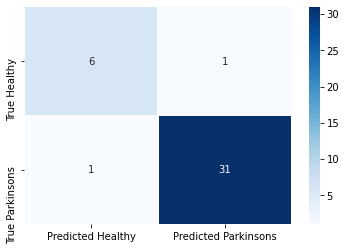

In [29]:
import seaborn as sns


sns.heatmap(a, cmap ='Blues', linewidths = 0.30, annot = True)

In [32]:
print("The F1 Score of the model is",f1_score(y_test,y_pred))

The F1 Score of the model is 0.96875


In [33]:
print ("The Accuracy of the model is",accuracy_score(y_test,y_pred))

The Accuracy of the model is 0.9487179487179487


In [34]:
from sklearn.metrics import precision_score, recall_score

In [35]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.969


In [36]:
print('Recall : %.3f' % recall_score(y_test, y_pred))

Recall : 0.969
